<a href="https://colab.research.google.com/github/Anshuzz/Data-Science-Assignment-Zeotap/blob/main/Anshuman_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Davies-Bouldin Index: 1.1181164026965122
Silhouette Score: 0.3593257034363925


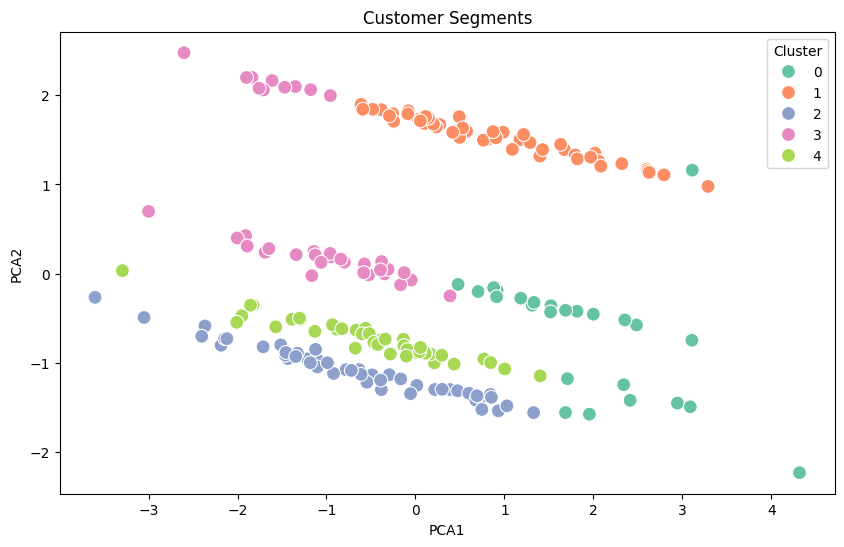

Customer segmentation results saved to 'Customer_Segments.csv'


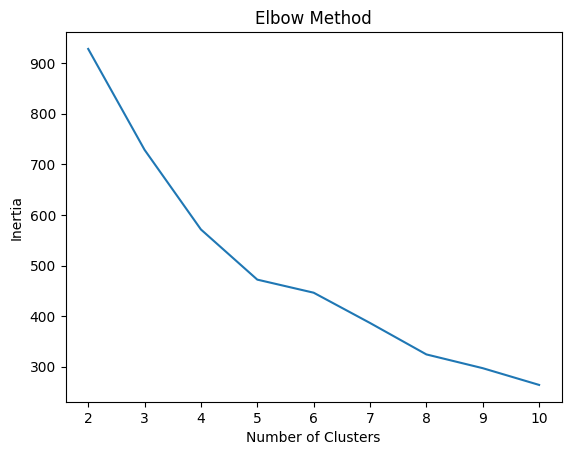

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the customer and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Prepare data for clustering
# Aggregate customer transaction and profile data
customer_data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Add customer profile features
customer_data = pd.merge(customer_data, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Encode categorical variables
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Normalize the data
scaler = StandardScaler()
normalized_customer_data = scaler.fit_transform(customer_data_encoded.iloc[:, 1:])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(normalized_customer_data)

# Add cluster labels to the data
customer_data['Cluster'] = clusters

# Evaluate clustering using Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_customer_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(normalized_customer_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_customer_data)

customer_data['PCA1'] = pca_result[:, 0]
customer_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='Set2', s=100
)
plt.title('Customer Segments')
plt.show()

# Save clustering results
customer_data.to_csv('Customer_Segments.csv', index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")

# Optional: Elbow Method to determine optimal number of clusters
inertia_values = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(normalized_customer_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

